In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [6]:
ksdata = pd.read_csv('datasets/kickstartercombo.csv')
ksdata.head(50)

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
0,0,1000002330,The Songs of Adelaide & Abullah,Publishing,Poetry,GB,failed,1000.0,0.00,GBP,2015-08-11 12:12:00,2015-10-09 11:36:00,0,0.000000,NaN,NaN
1,1,1000004038,Where is Hank?,Film & Video,Narrative Film,US,failed,45000.0,220.00,USD,2013-01-12 00:20:00,2013-02-26 00:20:00,3,220.000000,NaN,NaN
2,2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,US,failed,5000.0,1.00,USD,2012-03-17 03:24:00,2012-04-16 04:24:00,1,1.000000,NaN,NaN
3,3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,US,canceled,19500.0,1283.00,USD,2015-07-04 08:35:00,2015-08-29 01:00:00,14,1283.000000,NaN,NaN
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.00,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.000000,NaN,NaN
5,5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.00,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.000000,NaN,NaN
6,6,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Food,Drinks,US,failed,25000.0,453.00,USD,2016-02-01 20:05:00,2016-03-17 19:05:00,40,453.000000,NaN,NaN
7,7,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Design,Product Design,US,canceled,125000.0,8233.00,USD,2014-04-24 18:14:00,2014-05-29 18:14:00,58,8233.000000,NaN,NaN
8,8,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Film & Video,Documentary,US,canceled,65000.0,6240.57,USD,2014-07-11 21:55:00,2014-08-10 21:55:00,43,6240.570000,NaN,NaN
9,9,100004721,Of Jesus and Madmen,Publishing,Nonfiction,CA,failed,2500.0,0.00,CAD,2013-09-09 18:19:00,2013-10-09 18:19:00,0,0.000000,NaN,NaN


In [7]:
ksdata.dtypes

Unnamed: 0            int64
ID                    int64
name                 object
main_category        object
category             object
country              object
state                object
goal                float64
pledged             float64
currency             object
launched             object
deadline             object
backers               int64
usd pledged         float64
usd_goal_real       float64
usd_pledged_real    float64
dtype: object

In [8]:
ksdata.shape

(702411, 16)

In [9]:
ksdata['name'].unique()

array(['The Songs of Adelaide & Abullah', 'Where is Hank?',
       'ToshiCapital Rekordz Needs Help to Complete Album', ...,
       'ÉPOUVANTAILS : 28mm Figurines de jeux pour KINGS OF WAR',
       'Colorado International Activism Film Festival',
       'Homemade fresh dog food, Cleveland OH'], dtype=object)

In [10]:
ksdata['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Graphic Novels'], dtype=object)

In [11]:
ksdata.groupby(['name','main_category', 'state'])['state'].count()

name                                                                                   main_category  state     
    ITS A HOT CAPPUCCINO NIGHT                                                        Publishing     failed        1
    IT’S A HOT CAPPUCCINO NIGHT                                                        Publishing     failed        1
  "Pastriology": a global documentary                                                  Film & Video   failed        2
  15   A Feature Length Film (Canceled)                                                Film & Video   canceled      2
 "A Fine Mess." A Television Sitcom Pilot                                              Film & Video   failed        2
 "A TERRIBLE LIE," a new play by Jim Reyland                                           Theater        failed        2
 "Done With Error's," new EdGeR album and Film. Bring it to LIFE? Gifts! Great Art.    Music          failed        2
 "Gimme Five" for high five!                                 

In [12]:
ksdata_successful = ksdata.loc[ksdata['state']=='successful']

In [13]:
ksdata_successful.head(500)

,Unnamed: 0,ID,name,main_category,category,country,state,goal,pledged,currency,launched,deadline,backers,usd pledged,usd_goal_real,usd_pledged_real
4,4,1000014025,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.00,USD,2016-02-26 13:38:00,2016-04-01 13:38:00,224,52375.000000,NaN,NaN
5,5,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.00,USD,2014-12-01 18:30:00,2014-12-21 18:30:00,16,1205.000000,NaN,NaN
10,10,100005484,Lisa Lim New CD!,Music,Indie Rock,US,successful,12500.0,12700.00,USD,2013-03-09 06:42:00,2013-04-08 06:42:00,100,12700.000000,NaN,NaN
16,16,1000070642,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.00,USD,2012-08-02 14:11:00,2012-08-17 14:11:00,7,250.000000,NaN,NaN
18,18,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,US,successful,20000.0,34268.00,USD,2013-11-25 07:06:00,2013-12-30 07:06:00,624,34268.000000,NaN,NaN
21,21,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,US,successful,175.0,701.66,USD,2014-10-23 17:15:00,2014-11-12 17:15:00,66,701.660000,NaN,NaN
22,22,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,US,successful,10000.0,15827.00,USD,2010-12-07 23:16:00,2011-01-06 23:16:00,147,15827.000000,NaN,NaN
24,24,1000104688,Permaculture Skills,Film & Video,Webseries,CA,successful,17757.0,48905.00,CAD,2014-11-14 18:02:00,2014-12-14 18:02:00,571,43203.251140,NaN,NaN
25,25,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GB,successful,100.0,112.38,GBP,2015-12-29 16:59:00,2016-01-28 16:59:00,27,167.700306,NaN,NaN
27,27,1000117861,Ledr workbook: one tough journal!,Design,Product Design,US,successful,1000.0,47266.00,USD,2016-09-07 13:14:00,2016-10-08 02:00:00,549,11253.000000,NaN,NaN


In [14]:
ksdata_successful = ksdata_successful.drop(['Unnamed: 0', 'ID', 'currency', 'usd_goal_real', 'usd_pledged_real', 
                                              'usd pledged'], axis=1)

In [15]:
ksdata_successful.head(50)

,name,main_category,category,country,state,goal,pledged,launched,deadline,backers
4,Monarch Espresso Bar,Food,Restaurants,US,successful,50000.0,52375.00,2016-02-26 13:38:00,2016-04-01 13:38:00,224
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,US,successful,1000.0,1205.00,2014-12-01 18:30:00,2014-12-21 18:30:00,16
10,Lisa Lim New CD!,Music,Indie Rock,US,successful,12500.0,12700.00,2013-03-09 06:42:00,2013-04-08 06:42:00,100
16,Mike Corey's Darkness & Light Album,Music,Music,US,successful,250.0,250.00,2012-08-02 14:11:00,2012-08-17 14:11:00,7
18,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,US,successful,20000.0,34268.00,2013-11-25 07:06:00,2013-12-30 07:06:00,624
21,The Book Zoo - A Mini-Comic,Comics,Comics,US,successful,175.0,701.66,2014-10-23 17:15:00,2014-11-12 17:15:00,66
22,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,US,successful,10000.0,15827.00,2010-12-07 23:16:00,2011-01-06 23:16:00,147
24,Permaculture Skills,Film & Video,Webseries,CA,successful,17757.0,48905.00,2014-11-14 18:02:00,2014-12-14 18:02:00,571
25,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GB,successful,100.0,112.38,2015-12-29 16:59:00,2016-01-28 16:59:00,27
27,Ledr workbook: one tough journal!,Design,Product Design,US,successful,1000.0,47266.00,2016-09-07 13:14:00,2016-10-08 02:00:00,549


In [16]:
ksdata_successful['goal'].unique()

array([ 50000.,   1000.,  12500., ...,  12220.,   1140.,  33725.])

In [17]:
ksdata_successful[ksdata_successful['country']=='N,"0']

,name,main_category,category,country,state,goal,pledged,launched,deadline,backers
2102,An Oratorio for our Time - Last Stop Cafe,Music,Music,"N,""0",successful,5000.0,5170.00,2016-04-26 19:46:00,2016-05-26 19:46:00,0
4202,Jackson Ruby: The Cassette Album,Music,Music,"N,""0",successful,5000.0,5296.00,2016-04-11 19:29:00,2016-05-11 19:29:00,0
4598,Help Parker Brown make his first solo album,Music,Music,"N,""0",successful,3800.0,5077.00,2016-04-21 16:14:00,2016-05-21 16:14:00,0
4799,Help BETHANY record a NEW single in Nash!,Music,Music,"N,""0",successful,3500.0,3502.13,2016-04-04 23:32:00,2016-05-08 22:37:00,0
7089,Serena Gabriel's first CD!!!!!!: Diving Deep,Music,Music,"N,""0",successful,3500.0,3787.00,2016-03-25 17:20:00,2016-05-01 04:22:00,0
11170,SCiO: Your Sixth Sense. A Pocket Molecular Sen...,Technology,Hardware,"N,""0",successful,200000.0,2762571.78,2014-04-29 17:18:00,2014-06-15 21:00:00,0
11212,LUME Festival 2016,Music,Music,"N,""0",successful,3500.0,3606.00,2016-04-11 12:42:00,2016-05-12 01:00:00,0
12490,SUNN - EP - Pre-vente,Music,Music,"N,""0",successful,4000.0,4051.00,2016-03-25 16:56:00,2016-05-04 17:56:00,0
14427,"Willy Tea, Chris Doud and Chums: The Children'...",Music,Music,"N,""0",successful,3750.0,4593.00,2013-03-26 05:06:00,2013-04-09 06:06:00,0
18358,Nathan Menard,Music,Music,"N,""0",successful,8000.0,8263.45,2016-03-28 20:38:00,2016-05-07 20:38:00,0


In [18]:
ksdata_successful.drop(ksdata_successful.loc[ksdata_successful['country']=='N,"0'].index, inplace=True)

In [19]:
ksdata_successful.drop(ksdata_successful.loc[ksdata_successful['country']=='N,0"'].index, inplace=True)

In [20]:
ksdata_successful['country'].unique()

array(['US', 'CA', 'GB', 'AU', 'SE', 'DE', 'NZ', 'CH', 'NO', 'IT', 'NL',
       'FR', 'BE', 'DK', 'ES', 'IE', 'AT', 'SG', 'LU', 'HK', 'MX', 'JP'], dtype=object)

In [21]:
ksdata['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism', 'Graphic Novels'], dtype=object)

In [22]:
ksdata_successful['country'] = ksdata_successful['country'].map({'US':1, 'CA':2, 'GB':3, 'AU':4, 'SE':5, 'DE':6, 'NZ':7, 'CH':8, 'NO':9, 'IT':10, 'NL':11,
       'FR':12, 'BE':13, 'DK':14, 'ES':15, 'IE':16, 'AT':17, 'SG':18, 'LU':19, 'HK':20, 'MX':21,'JP':22})
ksdata_successful.head()

,name,main_category,category,country,state,goal,pledged,launched,deadline,backers
4,Monarch Espresso Bar,Food,Restaurants,1,successful,50000.0,52375.0,2016-02-26 13:38:00,2016-04-01 13:38:00,224
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,1,successful,1000.0,1205.0,2014-12-01 18:30:00,2014-12-21 18:30:00,16
10,Lisa Lim New CD!,Music,Indie Rock,1,successful,12500.0,12700.0,2013-03-09 06:42:00,2013-04-08 06:42:00,100
16,Mike Corey's Darkness & Light Album,Music,Music,1,successful,250.0,250.0,2012-08-02 14:11:00,2012-08-17 14:11:00,7
18,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,1,successful,20000.0,34268.0,2013-11-25 07:06:00,2013-12-30 07:06:00,624


In [23]:
ksdata_successful.groupby(['main_category'])['pledged'].sum()

main_category
Art             1.575526e+08
Comics          1.243951e+08
Crafts          2.423928e+07
Dance           2.370152e+07
Design          1.236357e+09
Fashion         2.264128e+08
Film & Video    6.362766e+08
Food            1.993732e+08
Games           1.216305e+09
Journalism      2.309141e+07
Music           3.382726e+08
Photography     6.111792e+07
Publishing      2.210009e+08
Technology      1.090519e+09
Theater         7.503944e+07
Name: pledged, dtype: float64

In [24]:
ksdata_successful_theater = ksdata_successful[ksdata_successful['main_category']=='Theater']

In [25]:
ksdata_successful_theater.head(100)

,name,main_category,category,country,state,goal,pledged,launched,deadline,backers
58,"Pantochino Productions: ""Cinderella Skeleton, ...",Theater,Theater,1,successful,15000.0,15425.00,2011-05-09 15:08:00,2011-07-08 15:08:00,144
68,Secular Solstice 2014,Theater,Festivals,1,successful,7500.0,8157.01,2014-10-02 01:50:00,2014-10-27 00:50:00,164
82,"""Little Shop of Horrors"" at the Browncoat Thea...",Theater,Theater,1,successful,2000.0,2075.00,2012-06-30 20:05:00,2012-08-14 20:05:00,40
136,Adele's Heart is Going to Edinburgh,Theater,Theater,1,successful,7500.0,8315.00,2012-05-14 14:33:00,2012-06-18 14:33:00,67
185,Chasing Blue at The Trans Theatre Festival,Theater,Festivals,1,successful,4000.0,4813.00,2016-04-29 19:53:00,2016-06-01 06:59:00,105
190,Tugboat Collective's Inaugural Season,Theater,Theater,1,successful,9000.0,10046.00,2012-09-12 05:32:00,2012-10-11 04:00:00,115
274,Heroes And Other Strangers at FringeNYC,Theater,Theater,1,successful,1971.0,2308.50,2011-05-30 05:52:00,2011-07-02 04:53:00,53
467,"Profound Fatigue, produced by Flying Deer Thea...",Theater,Theater,1,successful,900.0,1010.00,2011-05-12 06:16:00,2011-06-11 06:16:00,8
532,Dos Pueblos Tecnicos,Theater,Experimental,1,successful,500.0,500.00,2014-08-23 02:09:00,2014-09-02 07:00:00,6
644,"Shakespeare!! To fund or not to fund, that is ...",Theater,Plays,1,successful,250.0,251.00,2015-03-12 20:22:00,2015-04-11 21:22:00,8


In [26]:
ksdata_successful_theater.isnull().sum()

name             0
main_category    0
category         0
country          0
state            0
goal             0
pledged          0
launched         0
deadline         0
backers          0
dtype: int64

In [27]:
ksdata_successful_theater.corr()

,country,goal,pledged,backers
country,1.000000,0.129809,0.113106,-0.048726
goal,0.129809,1.000000,0.949199,0.639076
pledged,0.113106,0.949199,1.000000,0.720703
backers,-0.048726,0.639076,0.720703,1.000000


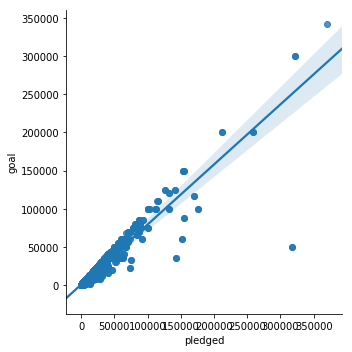

In [34]:
## make a scatter plot

sns.lmplot(x='pledged', y='goal', data=ksdata_successful_theater)

In [32]:
ksdata_successful_theater.to_csv('datasets/kickstartercombo_clean.csv', sep=',')